- `conda activate mri`
  - (created in `0_setup.ipynb`)

---

- `jupyter lab` => open this file

---

- Selected Jupyter default kernel (`ipykernel`)

---

---

# Definitions

In [1]:
import nibabel as nib

#
# function to visualize middle axial slice of registered vs pre-registration MRI
#

def visualize_2_mris(img1, img2):
    import matplotlib.pyplot as plt

    data_img1 = img1.get_fdata()
    data_img2 = img2.get_fdata()
                     
    # Choose the middle slice along the z-axis
    slice_index_img1 = data_img1.shape[2] // 2
    slice_index_img2 = data_img2.shape[2] // 2
    
    # Extract the slices
    slice_data_img1 = data_img1[:, :, slice_index_img1]
    slice_data_img2 = data_img2[:, :, slice_index_img2]
    
    # Plot the slices side by side
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    
    # Plot the first slice
    axs[0].imshow(slice_data_img1.T, cmap='gray', origin='lower')
    axs[0].set_title(f"{'/'.join(img1.get_filename().split('/')[-1:]).replace('.nii.gz','')} \n Middle Slice")
    axs[0].axis('off')
    
    # Plot the second slice
    axs[1].imshow(slice_data_img2.T, cmap='gray', origin='lower')
    axs[1].set_title(f"{'/'.join(img2.get_filename().split('/')[-1:]).replace('.nii.gz','')} \n Middle Slice")
    axs[1].axis('off')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

#
# function to visualize low and high slices in MRI from axial view
#

def visualize_mri_low_high_slices(img1, low=0.4, high=0.6):
    import matplotlib.pyplot as plt

    data_img1 = img1.get_fdata()
                     
    # Choose the middle slice along the z-axis
    slice_index_l = int(data_img1.shape[2] * low)
    slice_index_h = int(data_img1.shape[2] * high)
    
    # Extract the slices
    slice_data_l = data_img1[:, :, slice_index_l]
    slice_data_h = data_img1[:, :, slice_index_h]
    
    # Plot the slices side by side
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    
    # Plot the low slice
    axs[0].imshow(slice_data_l.T, cmap='gray', origin='lower')
    axs[0].set_title(f"{'/'.join(img1.get_filename().split('/')[-5:]).replace('.nii.gz','')} \nLow ({low}) Slice")
    axs[0].axis('off')
    
    # Plot the high slice
    axs[1].imshow(slice_data_h.T, cmap='gray', origin='lower')
    axs[1].set_title(f"\nHigh ({high}) Slice")
    axs[1].axis('off')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Check Scale and Orientation of Registered vs Original

---

(rigidly registered vs original)

---

## 256 x 256

---

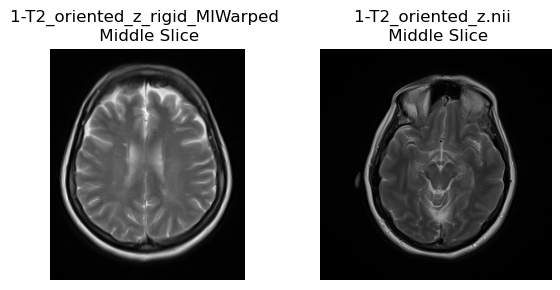

In [3]:
# shape == (256, 256, x)
primary = [1, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 29, 30, 4, 44, 46, 47, 49, 5, 50, 51, 52, 58, 6, 60, 7, 8]

for i in primary:
    visualize_2_mris(nib.load(f'~/dissertation/data/MRI/Muslim_et_al/Patient-{i}/{i}-T2_oriented_z_rigid_MIWarped.nii.gz'), 
                     nib.load(f'~/dissertation/data/MRI/Muslim_et_al/Patient-{i}/{i}-T2_oriented_z.nii'))

    break # keep saved notebook to minimal size

---

Scan 46 => unacceptable orientation  

---

## Check Tissue Positioning/Orientation at an Inferior (\~40%) and Superior (\~60%) Slice

(slice range selection performed in next notebook)

---

Identify 256x256 scans where degree of brain tissue loss/positioning errors is nominal (___within the region of interest___).

---

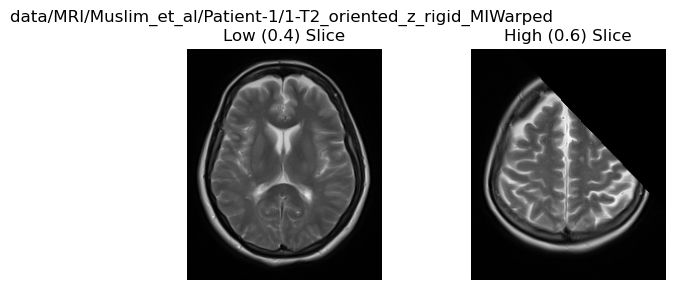

In [5]:
for i in primary:
    visualize_mri_low_high_slices(nib.load(f'~/dissertation/data/MRI/Muslim_et_al/Patient-{i}/{i}-T2_oriented_z_rigid_MIWarped.nii.gz'))

    break # keep saved notebook to minimal size


---

Scan 46 => unacceptable orientation  

---

---

## Check Scans Not of Size 256x256

---

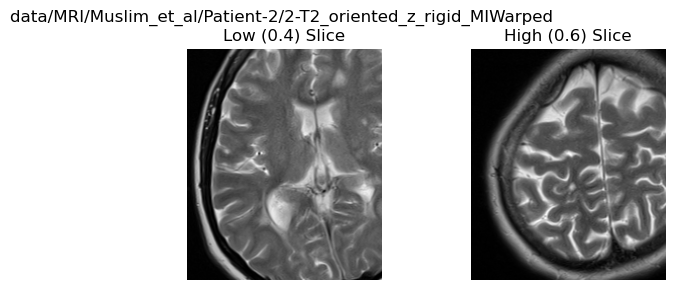

In [6]:
others = [x for x in list(range(1, 61, 1)) if x not in primary]

for i in others:
    visualize_mri_low_high_slices(nib.load(f'~/dissertation/data/MRI/Muslim_et_al/Patient-{i}/{i}-T2_oriented_z_rigid_MIWarped.nii.gz'))

    break # keep saved notebook to minimal size

---

---

# Perform Slice Range Selection on 29/30 Viable 256x256 Scans

(see next notebook)

---

---

---